<a href="https://colab.research.google.com/github/accarter/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean(lon):
  return sum(lon) / len(lon)

def var(lon):
  xbar = mean(lon)
  return sum((n - xbar) ** 2 for n in lon) / (len(lon) - 1)

def std(lon):
  return var(lon) ** .5

In [0]:
mean(sales)

3052.714285714286

In [0]:
var(sales)

214387.90476190473

In [0]:
std(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, customers)[0][1]
covariance

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def corr_coef(cov, sigma_x, sigma_y):
  return cov / (sigma_x * sigma_y)

corr_coef(covariance, std(sales), std(customers))

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd
from re import search

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [0]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
titanic_numeric = titanic[[titanic.columns[i] for i, dtype in enumerate(titanic.dtypes) if search("int", repr(dtype)) or search("float", repr(dtype))]]
titanic_numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [0]:
titanic_numeric.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpendicular.

In [0]:
import matplotlib.pyplot as plt

In [0]:
n = 25
a = [i if i % 2 == 0 else 0 for i in range(0,n)]
b = [i if i % 2 == 1 else 0 for i in range(0,n)]

np.dot(a,b)

0

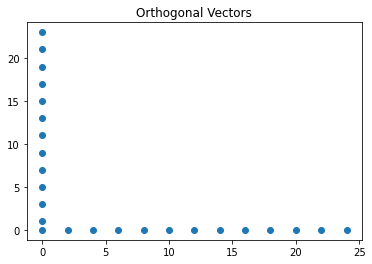

In [0]:
plt.scatter(a,b);
plt.title('Orthogonal Vectors');

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

Vectors a and b are not orthogonal because their dot product is not equal to 0.  Also, the two vectors should form a right angle when plotted if it is true that they are not orthogonal.  As indicated below, this is not the case.

In [0]:
a = [-5, 3, 7]
b = [6, -8, 2]
np.dot(a,b)

-40

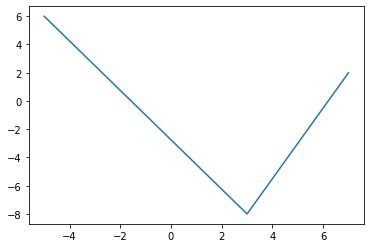

In [0]:
plt.plot(a,b);

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

$||c||^2$ is equal to the sum of the elements for either $c \cdot c$ or $c^{T}c$, which are equivalent.

In [0]:
c = np.array([2, -15, 6, 20])

In [0]:
np.linalg.norm(c) ** 2

665.0

In [0]:
c ** 2

array([  4, 225,  36, 400])

In [0]:
c.T * c

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end {bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end {bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
def toUnitVector(v):
  v = np.array(v)
  return v / np.linalg.norm(v)

toUnitVector([4, 12, 11, 9, 2])

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

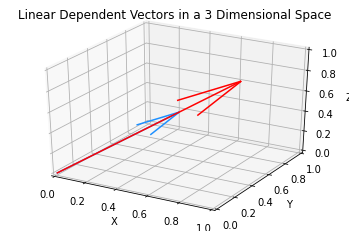

In [0]:
def plot_3D_vector(vectors, colors, title):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for v, color in zip(vectors, colors):
    ax.quiver(0, 0, 0, v[0], v[1], v[2], length=1, color=color)
  ax.set_xlim([0, 1])
  ax.set_ylim([0, 1])
  ax.set_zlim([0, 1])
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title(title)
  plt.show()

a = np.array([.5, .5, .5])
b = a * 1.5
colors = ['dodgerblue', 'red']
vectors = [a, b]
plot_3D_vector(vectors, colors, 'Linear Dependent Vectors in a 3 Dimensional Space')

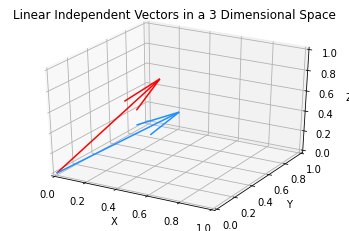

In [0]:
vectors[1] = [.2, .8, .6]
plot_3D_vector(vectors, colors, 'Linear Independent Vectors in a 3 Dimensional Space')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = [1, 2]
h = [4, 8]

np.linalg.matrix_rank([g, h])

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

np.linalg.matrix_rank([l,m,n])

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



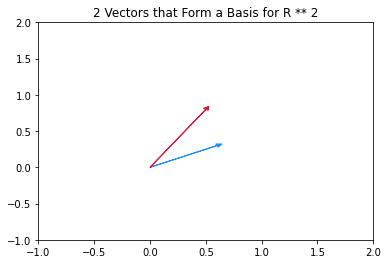

In [0]:
v0 = [.5, .5]

def plot_2D_vectors(vectors, colors):
  for v, color in zip(vectors, colors):
    plt.arrow(0, 0, v[0], v[1], head_width=.05, head_length=0.05, color=color)
  plt.xlim(-1,2)
  plt.ylim(-1,2)
  plt.title("2 Vectors that Form a Basis for R ** 2")
  plt.show()

plot_2D_vectors([[.6, .3], [.5, .8]], ['dodgerblue', 'crimson'])

## 6.2 What does it mean to form a basis?

To determine the set of non-redundant (i.e. linearly independent) set of vectors that spans the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The number of linearly independent vectors in a matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1, 3])
w = np.array([-1, 2])
v, w

(array([1, 3]), array([-1,  2]))

In [0]:
w_dot_v = np.dot(v,w)
v_dot_v = np.dot(v,v)
w_dot_v, v_dot_v

(5, 10)

In [0]:
# fraction
fraction = w_dot_v / v_dot_v
fraction

0.5

In [0]:
projection = np.multiply(fraction, v)
projection

array([0.5, 1.5])

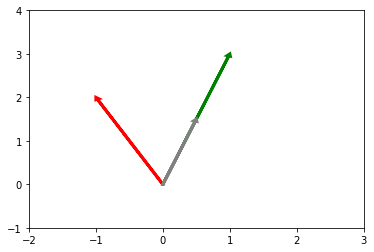

In [0]:
plt.xlim(-2,3)
plt.ylim(-1,4)

for vec, color in zip([w, v, projection], ['red','green','gray']):
  plt.arrow(0, 0, vec[0], vec[1], linewidth=3, head_width=.05, head_length=.05, color=color, length_includes_head=True)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

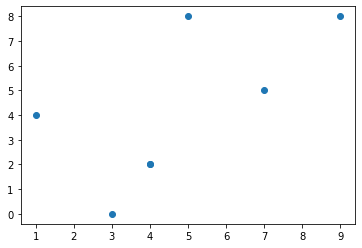

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()